In [1]:
!wget --no-check-certificate "https://onedrive.live.com/download?cid=11F71A1654195330&resid=11F71A1654195330%2145779&authkey=AHYqi-q2jYSmI5k"

--2019-05-14 15:27:26--  https://onedrive.live.com/download?cid=11F71A1654195330&resid=11F71A1654195330%2145779&authkey=AHYqi-q2jYSmI5k
Resolving onedrive.live.com (onedrive.live.com)... 13.107.42.13
Connecting to onedrive.live.com (onedrive.live.com)|13.107.42.13|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://lgojyq.am.files.1drv.com/y4mJEEFKzw_iUS2JMivZ2ySVk1HhfIMHTHiuPjAFJUDWT17Ah46FEUzg4RWBpMwih4XqX03734v1ZeJYIN-Yz50unf7PHCmgTWdjt-ziB5yeJpQ6taiifmWB3c22VNndLkHml-QYIozegO-MnfzY5EDL_XD9kkamm_YDuALhdZOgcBKwaqNs6wLAiCrUeCCstGKamJSJXfIYsZDIxMDM4tfcw/ALL_50K.zip?download&psid=1 [following]
--2019-05-14 15:27:26--  https://lgojyq.am.files.1drv.com/y4mJEEFKzw_iUS2JMivZ2ySVk1HhfIMHTHiuPjAFJUDWT17Ah46FEUzg4RWBpMwih4XqX03734v1ZeJYIN-Yz50unf7PHCmgTWdjt-ziB5yeJpQ6taiifmWB3c22VNndLkHml-QYIozegO-MnfzY5EDL_XD9kkamm_YDuALhdZOgcBKwaqNs6wLAiCrUeCCstGKamJSJXfIYsZDIxMDM4tfcw/ALL_50K.zip?download&psid=1
Resolving lgojyq.am.files.1drv.com (lgojyq.am.files.1drv.com)

In [0]:
!unzip -q "download?cid=11F71A1654195330&resid=11F71A1654195330!45779&authkey=AHYqi-q2jYSmI5k"

In [9]:
import numpy as np
import tensorflow as tf
from keras import models
from keras import layers
import os


data_dir = './ALL_50K'
base_train_dir = os.path.join(data_dir, 'train')
base_test_dir = os.path.join(data_dir, 'test')


# Das CNN
# Das Model arbeitet sequentiell
# Aktivierungsfunktion kann ersetzt werden
# Die Anzahl der Neuronen der Layer kann verändert werden
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(60, 60, 3), use_bias=False))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(16, (3, 3), activation='relu', use_bias=False))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten()) # "Abflachen" der Layer zu 1D
model.add(layers.Dense(10, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.summary()
# Auswahl der Loss-Function und des Optimizers
# binary_crossentropy muss bestehen bleiben, da binäres Problem
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 58, 58, 16)        432       
_________________________________________________________________
batch_normalization_1 (Batch (None, 58, 58, 16)        64        
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 29, 29, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 27, 27, 16)        2304      
_________________________________________________________________
batch_normalization_2 (Batch (None, 27, 27, 16)        64        
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2704)              0         
__________

In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)



test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        base_train_dir,
        target_size=(60, 60),
        batch_size=128,
        class_mode='binary'
        )

validation_generator = test_datagen.flow_from_directory(
        base_test_dir,
        target_size=(60, 60),
        batch_size=128,
        class_mode='binary'
        )

Found 43412 images belonging to 2 classes.
Found 11590 images belonging to 2 classes.


In [12]:
from keras. callbacks import EarlyStopping

es = EarlyStopping(monitor='val_acc', patience=5, restore_best_weights=True)

history = model.fit_generator(
                              train_generator,
                              steps_per_epoch=339, 
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=90, 
                              callbacks=[es]
                             )

Epoch 1/100
339/339 [==============================] - 45s 131ms/step - loss: 0.0333 - acc: 0.9891 - val_loss: 0.1367 - val_acc: 0.9431
Epoch 2/100
339/339 [==============================] - 44s 131ms/step - loss: 0.0099 - acc: 0.9974 - val_loss: 0.1008 - val_acc: 0.9588
Epoch 3/100
339/339 [==============================] - 43s 127ms/step - loss: 0.0063 - acc: 0.9986 - val_loss: 0.0782 - val_acc: 0.9709
Epoch 4/100
339/339 [==============================] - 45s 132ms/step - loss: 0.0058 - acc: 0.9988 - val_loss: 0.2693 - val_acc: 0.9196
Epoch 5/100
339/339 [==============================] - 43s 126ms/step - loss: 0.0058 - acc: 0.9988 - val_loss: 0.2763 - val_acc: 0.9215
Epoch 6/100
339/339 [==============================] - 44s 130ms/step - loss: 0.0053 - acc: 0.9988 - val_loss: 0.2252 - val_acc: 0.9426
Epoch 7/100
339/339 [==============================] - 42s 125ms/step - loss: 0.0050 - acc: 0.9989 - val_loss: 0.0502 - val_acc: 0.9873
Epoch 8/100
339/339 [===========================

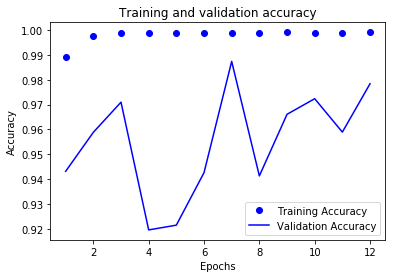

In [13]:
# Grafische (Verlaufs-)Darstellung des Loss

%matplotlib inline  
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" = Blauer Punkt
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
# "b" = Blaue Linie
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [14]:
!wget --no-check-certificate "https://onedrive.live.com/download?cid=11F71A1654195330&resid=11F71A1654195330%2145681&authkey=AIicdVtkBEkQgvU"

--2019-05-14 15:50:48--  https://onedrive.live.com/download?cid=11F71A1654195330&resid=11F71A1654195330%2145681&authkey=AIicdVtkBEkQgvU
Resolving onedrive.live.com (onedrive.live.com)... 13.107.42.13
Connecting to onedrive.live.com (onedrive.live.com)|13.107.42.13|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://mwrg1q.am.files.1drv.com/y4mzg7OQlh_U2TC3Y5W_gH21GH-EyZnG_Q7c6eA9uIShh4uRn2qKbAientQjHVfLKs7VhvCclUC6S6oYSO__zoq0nKA2bwmfsXJEv2_Q5zjMC1CsmktIQcJemcobs99YjTR02Lpwev_ep1mNWuP71pdwDXmB-SPKzxUIPnS1_lu5bYynU2pARNPEwM8yGDvV4KUUMjk8mcoyJ1hlqQ2H18iBw/CNR_TEST.zip?download&psid=1 [following]
--2019-05-14 15:50:49--  https://mwrg1q.am.files.1drv.com/y4mzg7OQlh_U2TC3Y5W_gH21GH-EyZnG_Q7c6eA9uIShh4uRn2qKbAientQjHVfLKs7VhvCclUC6S6oYSO__zoq0nKA2bwmfsXJEv2_Q5zjMC1CsmktIQcJemcobs99YjTR02Lpwev_ep1mNWuP71pdwDXmB-SPKzxUIPnS1_lu5bYynU2pARNPEwM8yGDvV4KUUMjk8mcoyJ1hlqQ2H18iBw/CNR_TEST.zip?download&psid=1
Resolving mwrg1q.am.files.1drv.com (mwrg1q.am.files.1drv.co

In [0]:
!unzip -q "download?cid=11F71A1654195330&resid=11F71A1654195330!45681&authkey=AIicdVtkBEkQgvU"

In [16]:
temp = os.path.join("./CNR", 'test')

test_generator = test_datagen.flow_from_directory(
        temp,
        target_size=(60, 60),
        batch_size=200,
        class_mode='binary'
        )


model.evaluate_generator(test_generator,20)

Found 144965 images belonging to 2 classes.


[0.5833205178380012, 0.8722499936819077]